# Case Study 2 - [Fuel Economy Testing](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy)

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read the 2008 dataset
all_08 = pd.read_csv('all_alpha_08.csv')
all_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [3]:
# read the 2018 dataset
all_18 = pd.read_csv('all_alpha_18.csv')
all_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


## Assessing Data
The files ``all_alpha_08.csv`` and ``all_alpha_18.csv`` discussed in the previous pages have been provided in the workspace for you here to access. Use pandas to explore these datasets in the Jupyter Notebook below to answer the quiz questions below the notebook about these characteristics of the data:

- number of samples in each dataset
- number of columns in each dataset
- duplicate rows in each dataset
- datatypes of columns
- features with missing values
- number of non-null unique values for features in each dataset
- what those unique values are and counts for each

In [4]:
# number of samples in each dataset
all_08.shape[0], all_18.shape[0]

(2404, 1611)

In [5]:
# number of columns in each dataset
all_08.shape[1], all_18.shape[1]

(18, 18)

In [6]:
# duplicate rows in each dataset
sum(all_08.duplicated()), sum(all_18.duplicated())

(25, 0)

In [7]:
# datatypes of columns
all_08.dtypes, '-'*30, all_18.dtypes
# Cyl, Air Pollution Score, Unadj -Cmb MPG-, Greenhouse Gas Score are different

(Model                    object
 Displ                   float64
 Cyl                      object
 Trans                    object
 Drive                    object
 Fuel                     object
 Sales Area               object
 Stnd                     object
 Underhood ID             object
 Veh Class                object
 Air Pollution Score      object
 FE Calc Appr             object
 City MPG                 object
 Hwy MPG                  object
 Cmb MPG                  object
 Unadj Cmb MPG           float64
 Greenhouse Gas Score     object
 SmartWay                 object
 dtype: object,
 '------------------------------',
 Model                    object
 Displ                   float64
 Cyl                     float64
 Trans                    object
 Drive                    object
 Fuel                     object
 Cert Region              object
 Stnd                     object
 Stnd Description         object
 Underhood ID             object
 Veh Class               

In [8]:
# features with missing values
all_08.columns[all_08.isnull().any()], all_18.columns[all_18.isnull().any()]

(Index(['Cyl', 'Trans', 'Drive', 'FE Calc Appr', 'City MPG', 'Hwy MPG',
        'Cmb MPG', 'Unadj Cmb MPG', 'Greenhouse Gas Score'],
       dtype='object'),
 Index(['Displ', 'Cyl'], dtype='object'))

In [9]:
# number of non-null unique values for features in each dataset
# what those unique values are and counts for each
for col in all_08.columns:
    print('{}: {}'.format(col, len(all_08[col].dropna().unique())))

Model: 436
Displ: 47
Cyl: 8
Trans: 14
Drive: 2
Fuel: 5
Sales Area: 3
Stnd: 12
Underhood ID: 343
Veh Class: 9
Air Pollution Score: 13
FE Calc Appr: 2
City MPG: 39
Hwy MPG: 43
Cmb MPG: 38
Unadj Cmb MPG: 721
Greenhouse Gas Score: 20
SmartWay: 2


In [10]:
for col in all_18.columns:
    print('{}: {}'.format(col, len(all_18[col].dropna().unique())))

Model: 367
Displ: 36
Cyl: 7
Trans: 26
Drive: 2
Fuel: 5
Cert Region: 2
Stnd: 19
Stnd Description: 19
Underhood ID: 230
Veh Class: 9
Air Pollution Score: 6
City MPG: 58
Hwy MPG: 62
Cmb MPG: 57
Greenhouse Gas Score: 10
SmartWay: 3
Comb CO2: 299


## Cleaning Column Labels

> **Drop extraneous columns**  
Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use `pandas' drop` function.  
Columns to Drop:
- From 2008 dataset: `'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'`
- From 2018 dataset: `'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'`

> **Rename Columns**  
- Change the `"Sales Area"` column label in the 2008 dataset to `"Cert Region"` for consistency.  
- Rename all column labels to replace spaces with underscores and convert everything to lowercase.  
  (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of `df['column_name']` to select columns or use `query()`. Being consistent with lowercase and underscores also helps make column

In [11]:
# Drop extraneous columns
all_08.drop(columns=['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], inplace=True)
all_18.drop(columns=['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], inplace=True)

In [12]:
# Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.
all_08.rename(columns={"Sales Area": "Cert Region"}, inplace=True)

In [13]:
# Rename all column labels to replace spaces with underscores and convert everything to lowercase.
all_08.rename(columns= lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
all_18.rename(columns= lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [14]:
all_08.columns == all_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Filter, Drop Nulls, Dedupe

1. **Filter**  
For consistency, only compare cars certified by California standards. Filter both datasets using `query` to select only rows where `cert_region` is `CA`. Then, drop the `cert_region` columns, since it will no longer provide any useful information (we'll know every value is `'CA'`).  


2. **Drop Nulls**  
Drop any rows in both datasets that contain missing values.  


3. **Dedupe**  
Drop any duplicate rows in both datasets.

In [15]:
# Filter
ca_08 = all_08.query("cert_region == 'CA'")
ca_18 = all_18.query("cert_region == 'CA'")

In [16]:
# drop the cert_region columns
ca_08.drop(columns=['cert_region'], inplace=True)
ca_18.drop(columns=['cert_region'], inplace=True)

C:\Users\Mahmoud\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
# Drop any rows in both datasets that contain missing values.
ca_08.dropna(axis=0, how='any', inplace=True)
ca_18.dropna(axis=0, how='any', inplace=True)

C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
ca_08.drop_duplicates(inplace=True)
ca_18.drop_duplicates(inplace=True)

C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
ca_08.shape, ca_18.shape

((986, 13), (794, 13))

## Inspecting Data Types
Use this Jupyter Notebook to inspect the datatypes of features in each dataset and think about what changes should be made to make them practical and consistent (in both datasets). Use this to help you answer the quiz questions below.

In [20]:
# Cyl, air_pollution_score, greenhouse_gas_score are different
ca_08.dtypes, '-'*30, ca_18.dtypes

(model                    object
 displ                   float64
 cyl                      object
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score      object
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 '------------------------------',
 model                    object
 displ                   float64
 cyl                     float64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score       int64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [21]:
# Extract int values from the strings in the 2008 cyl column.
# Convert floats to ints in the 2018 cyl column.
ca_08.cyl.unique(), ca_18.cyl.unique()

(array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
        '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object),
 array([ 6.,  4.,  5., 12., 16.,  8.,  3.]))

In [22]:
# Convert strings to floats in the 2008 column.
# Convert ints to floats in the 2018 columns.
ca_08.air_pollution_score.unique(), ca_18.air_pollution_score.unique()

(array(['7', '6', '9.5', '9', '6/4'], dtype=object),
 array([3, 1, 7, 5, 6], dtype=int64))

*`_mpg` need to be converted to floats from strings

In [23]:
# Convert strings to ints in the 2008 column.
ca_08.greenhouse_gas_score.unique(), ca_18.greenhouse_gas_score.unique()

(array(['4', '5', '6', '7', '0', '1', '3', '2', '8', '9', '10', '7/6'],
       dtype=object),
 array([ 5,  4,  6,  7,  2,  1, 10,  3,  9,  8], dtype=int64))

## Fixing Data Types
In the next three sections, you'll make the following changes to make the datatypes consistent and practical to work with.



> **Fix `cyl` datatype**
- 2008: extract int from string.
- 2018: convert float to int.

In [24]:
ca_08.cyl = ca_08.cyl.str.extract('(\d+)').astype(int)
ca_18.cyl = ca_18.cyl.astype(int)

C:\Users\Mahmoud\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


> **Fix `air_pollution_score` datatype**
- 2008: convert string to float.
- 2018: convert int to float.

In [25]:
# pd.to_numeric(ca_08.air_pollution_score)

# ValueError: Unable to parse string "6/4" at position 582

In [26]:
ca_08[ca_08['air_pollution_score'] == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [27]:
ca_08.iloc[582, :]

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 1550, dtype: object

The `mpg` columns and `greenhouse_gas_score` also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](https://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

`"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."`

Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. 

In [28]:
# First, let's get all the hybrids in 2008
hybrid_08 = ca_08[ca_08['fuel'].str.contains('/')]
len(hybrid_08)

1

In [29]:
# let's get all the hybrids in 2008
hybrid_18 = ca_18[ca_18['fuel'].str.contains('/')]
len(hybrid_18)

38

In [30]:
# create two copies of the 2008 hybrids dataframe
df1 = hybrid_08.copy()  
df2 = hybrid_08.copy() 

In [31]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for col in split_columns:
    df1[col] = df1[col].apply(lambda x: x.split('/')[0])
    df2[col] = df2[col].apply(lambda x: x.split('/')[1])

In [32]:
df1.fuel, df2.fuel

(1550    ethanol
 Name: fuel, dtype: object,
 1550    gas
 Name: fuel, dtype: object)

In [33]:
# append the two dataframes
new_rows = df1.append(df2)
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [34]:
# drop the original 2008 hybrid rows
ca_08.drop(hybrid_08.index, inplace=True)

# append new_rows to ca_08
ca_08 = ca_08.append(new_rows, ignore_index=True)

C:\Users\Mahmoud\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
ca_08[ca_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


### Do the same with 2018 dataset `ca_18`

In [36]:
# create two copies of the 2018 hybrids dataframe
df1 = hybrid_18.copy()
df2 = hybrid_18.copy()

In [37]:
# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for col in split_columns:
    df1[col] = df1[col].apply(lambda x: x.split('/')[0])
    df2[col] = df2[col].apply(lambda x: x.split('/')[1])

In [38]:
df1.fuel.head(2), df2.fuel.head(2)

(108    Gasoline
 160    Gasoline
 Name: fuel, dtype: object,
 108    Electricity
 160    Electricity
 Name: fuel, dtype: object)

In [39]:
# append the two dataframes
new_rows = df1.append(df2)
len(new_rows), 38*2

(76, 76)

In [40]:
# drop the original 2018 hybrid rows
ca_18.drop(hybrid_18.index, inplace=True)

# append new_rows to ca_18
ca_18 = ca_18.append(new_rows, ignore_index=True)

C:\Users\Mahmoud\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
ca_18[ca_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [42]:
ca_08.shape, ca_18.shape

((987, 13), (832, 13))

### Now we can comfortably continue the changes needed for air_pollution_score! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [43]:
ca_08.air_pollution_score = ca_08.air_pollution_score.astype(float)
ca_18.air_pollution_score = ca_18.air_pollution_score.astype(float)

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
- 2008 and 2018: convert string to float.

In [44]:
# city_mpg
ca_08.city_mpg = ca_08.city_mpg.astype(float)
ca_18.city_mpg = ca_18.city_mpg.astype(float)

# hwy_mpg
ca_08.hwy_mpg = ca_08.hwy_mpg.astype(float)
ca_18.hwy_mpg = ca_18.hwy_mpg.astype(float)

# cmb_mpg
ca_08.cmb_mpg = ca_08.cmb_mpg.astype(float)
ca_18.cmb_mpg = ca_18.cmb_mpg.astype(float)

## Fix `greenhouse_gas_score` datatype
- 2008: convert from float to int.

In [45]:
ca_08.greenhouse_gas_score = ca_08.greenhouse_gas_score.astype(float)
ca_18.greenhouse_gas_score = ca_18.greenhouse_gas_score.astype(float)

## Exploring with Visuals
Use histograms and scatterplots to explore `ca_08.csv` and `ca_18.csv` in the Jupyter notebook. Then, answer the quiz questions below the notebook

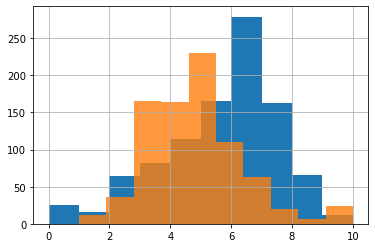

In [46]:
# Compare the distributions of greenhouse gas score in 2008 and 2018.
ca_08.greenhouse_gas_score.hist();
ca_18.greenhouse_gas_score.hist(alpha=0.8);

Distribution for 2008 is more skewed to the left.

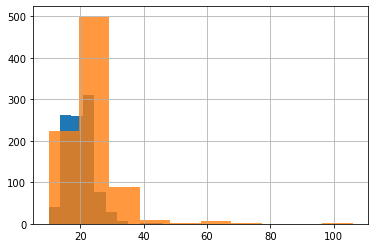

In [47]:
# How has the distribution of combined mpg changed from 2008 to 2018?
ca_08.cmb_mpg.hist();
ca_18.cmb_mpg.hist(alpha=0.8);

Became much more skewed to the right

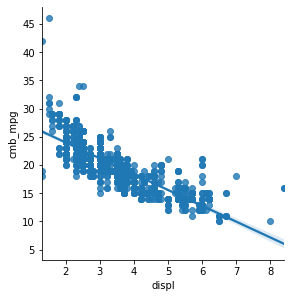

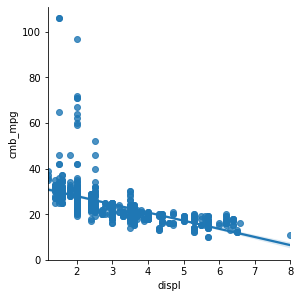

In [48]:
# Describe the correlation between displacement and combined mpg.
sns.pairplot(ca_08, x_vars='displ', y_vars='cmb_mpg', height=4, kind='reg');
sns.pairplot(ca_18, x_vars='displ', y_vars='cmb_mpg', height=4, kind='reg');

Negative correlation

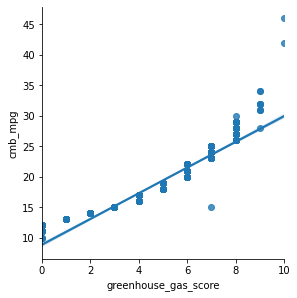

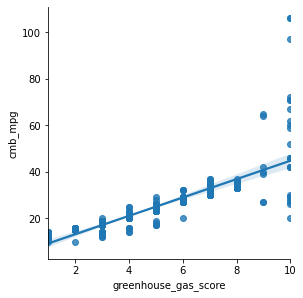

In [49]:
# Describe the correlation between greenhouse gas score and combined mpg.
sns.pairplot(ca_08, x_vars='greenhouse_gas_score', y_vars='cmb_mpg', height=4, kind='reg');
sns.pairplot(ca_18, x_vars='greenhouse_gas_score', y_vars='cmb_mpg', height=4, kind='reg');

Positive correlation

## Conclusions & Visuals
Draw conclusions and create visuals to communicate results in the Jupyter notebook below! Make sure to address the following questions.

- Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
- How much have vehicle classes improved in fuel economy (increased in mpg)?
- What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
- What features are associated with better fuel economy (mpg)?

In [50]:
# Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

# Let's first look at what the sources of fuel are and which ones are alternative sources
ca_08.fuel.value_counts()

Gasoline    984
ethanol       1
gas           1
CNG           1
Name: fuel, dtype: int64

In [51]:
ca_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [52]:
# how many unique models used alternative sources of fuel in 2008
len(ca_08.query("fuel in ['CNG', 'ethanol']")['model'].unique())

2

In [53]:
# how many unique models used alternative sources of fuel in 2018
len(ca_18.query("fuel in ['Ethanol', 'Electricity']")['model'].unique())
# ca_18.query("fuel in ['Ethanol', 'Electricity']")['model'].nunique()

26

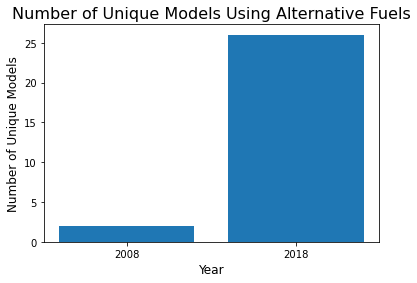

In [54]:
plt.bar(["2008", "2018"], [2,26])
plt.title("Number of Unique Models Using Alternative Fuels", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Unique Models", fontsize=12);

#### How much have `vehicle classes` improved in fuel economy (increased in `mpg`)?

In [55]:
ca_08.groupby('veh_class')['cmb_mpg'].mean()

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [56]:
ca_18.groupby('veh_class')['cmb_mpg'].mean()

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

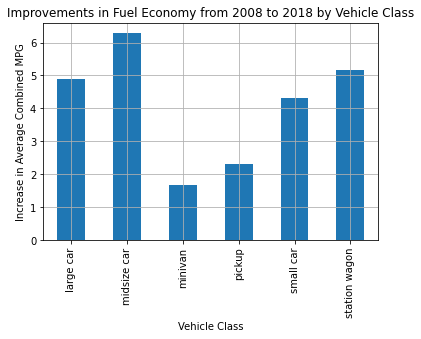

In [57]:
# how much they've increased by for each vehicle class
(ca_18.groupby('veh_class')['cmb_mpg'].mean() - ca_08.groupby('veh_class')['cmb_mpg'].mean()).dropna().plot(kind='bar', grid=True);
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

#### What are the characteristics of `SmartWay` vehicles? Have they changed over time? (`mpg`, `greenhouse gas`)

In [58]:
ca_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [59]:
ca_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

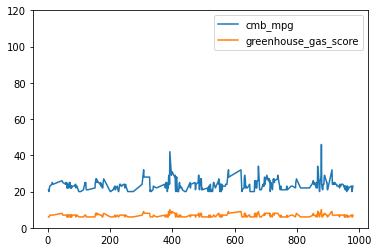

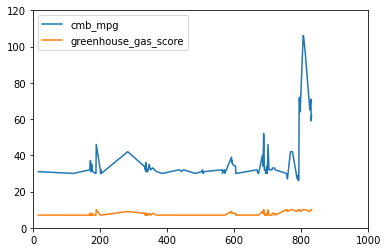

In [60]:
ca_08.query("smartway == 'yes'")[['cmb_mpg', 'greenhouse_gas_score']].plot();
plt.ylim([0, 120]);
ca_18.query("smartway in ['Yes', 'Elite']")[['cmb_mpg', 'greenhouse_gas_score']].plot();
plt.xlim([0, 1000])
plt.ylim([0, 120]);

`mpg` is much higher in 2018, and the `greenhouse_gas_score` is almost the same.

#### What features are associated with better fuel economy (`mpg`)?

You can explore trends between `cmb_mpg` and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [61]:
ca_08.query('cmb_mpg > cmb_mpg.mean()').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [62]:
ca_18.query('cmb_mpg > cmb_mpg.mean()').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


## Merging Datasets

1. Rename 2008 columns to distinguish from 2018 columns after the merge
To do this, use `pandas' rename()` with a lambda function. See example here. In the lambda function, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

The lambda function should look something like this: `lambda x: x[:10] + "_2008"`  
In your rename, don't forget to specify the parameter `columns=` when you add the lambda function!


2. Perform inner merge
To answer the last question, we are only interested in how the same `model` of car has been updated and how the new model's `mpg` compares to the old model's `mpg`.

Perform an inner merge with the left on `model_2008` and the right on `model`.

In [63]:
# ca_08.rename(columns= lambda col: col+'_2008')

In [64]:
# The following is the nicest way to add suffix in my opinion.
ca_08 = ca_08.add_suffix('_2008')

In [69]:
df = ca_08.merge(ca_18, left_on='model_2008', right_on='model', how='inner')

## Results with Merged Dataset
Use the notebook below to answer the final question with the merged dataset.

**For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?**

Here are the steps for answering this question.

1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model
To do this, group by model and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [78]:
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [82]:
mpg_change = model_mpg.cmb_mpg - model_mpg.cmb_mpg_2008

In [86]:
mpg_change.argmax()

71

In [87]:
mpg_change[71]

16.53333333333334